<a href="https://colab.research.google.com/github/armoredv/DL_projects/blob/master/CXR_project_Neelansh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Unzipping of Data files containing Dsta 
import zipfile
k = zipfile.ZipFile('/content/gdrive/My Drive/images/AI61002_covid_19_new.zip',"r")
 # for extraction of the zips file
k.extract(k.namelist()[0])

In [0]:
print(k.namelist()[8])

AI61002_covid_19/images/CheXpert-v1.0-small/Source3/


In [0]:
print(k.namelist()[len(k.namelist())-500])

AI61002_covid_19/images/Source4/person957_virus_1629.jpeg


<center>**bold text** COVID19 Action-Radiology-CXR 


In [1]:
#As directed by Professor and due to the unstable and insufficient Internet the data of Source-3 have not been used in this notebook 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sn 
import scipy
from sklearn.utils import shuffle
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets
import torch.nn.functional as F
from torchvision import transforms,datasets
from PIL import Image
import timeit
from skimage import io, transform
import os
from torch.utils.data import Dataset
import math
import numpy as np
from torch import optim


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
rootpath = "/content/gdrive/My Drive/images/"  #address of the integrated folder containing all the images as well as all csv files file in the source like manner 

<center> Conversion of all the three classes (COVID_19,Pneumonia and Non-pneumonia) into one label class </center> 

In [0]:
#label=  1 for covid-19
#label = 2 for non- pneumonia (Healthy-Patients)
#label = 0 for Pnuemonia
df = pd.read_csv(rootpath+'Train_Combined.csv')
gk = df.groupby(['COVID-19'])
df_temp = gk.get_group(1)
df_temp.loc[:,'labels']=1   
df_temp1 = gk.get_group(0).groupby(['Non-Pneumonia'])
df_temp11 = df_temp1.get_group(1)
df_temp11.loc[:,'labels']=2 
df_temp12 = df_temp1.get_group(0)
df_temp12.loc[:,'labels']=0
train_df = pd.concat([df_temp,df_temp11,df_temp12])


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
#label=  1 for covid-19
#label = 2 for non- pneumonia (Healthy-Patients)
#label = 0 for Pnuemonia
df = pd.read_csv(rootpath+'Test_Combined.csv')
gk = df.groupby(['COVID-19'])
df_temp = gk.get_group(1)
df_temp.loc[:,'labels']=1   
df_temp1 = gk.get_group(0).groupby(['Non-Pneumonia'])
df_temp11 = df_temp1.get_group(1)
df_temp11.loc[:,'labels']=2 
df_temp12 = df_temp1.get_group(0)
df_temp12.loc[:,'labels']=0
test_df = pd.concat([df_temp,df_temp11,df_temp12])


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


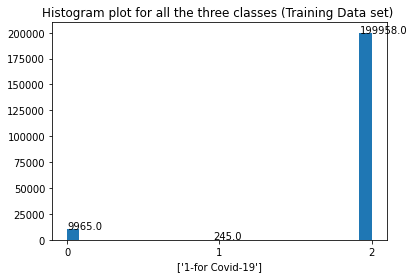

In [0]:
arr = plt.hist(train_df.labels,bins=25)
plt.text(arr[1][0],arr[0][0],str(arr[0][0]))
plt.text(arr[1][12],arr[0][12],str(arr[0][12]))
plt.text(arr[1][24],arr[0][24],str(arr[0][24]))
plt.xticks(np.arange(3))
plt.xlabel(['1-for Covid-19'])
plt.title("Histogram plot for all the three classes (Training Data set) ")
plt.show()




<center> Histogram Ploting of all the three labels in order to check class imbalance</center>

In [0]:
#Droping the source-3 data 
train_df = train_df[train_df['Data Source']!='Source-3']
#train_df = train_df[train_df['Data Source']!='Source-4']
test_df = test_df[test_df['Data Source']!='Source-3']
#test_df = test_df[test_df['Data Source']!='Source-4']



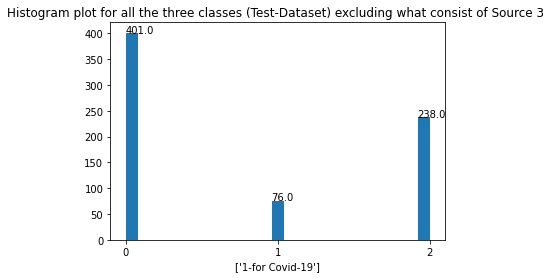

In [0]:
arr = plt.hist(test_df.labels,bins=25)
plt.text(arr[1][0],arr[0][0],str(arr[0][0]))
plt.text(arr[1][12],arr[0][12],str(arr[0][12]))
plt.text(arr[1][24],arr[0][24],str(arr[0][24]))
plt.xticks(np.arange(3))
plt.xlabel(['1-for Covid-19'])
plt.title("Histogram plot for all the three classes (Test-Dataset) excluding what consist of Source 3 ")
plt.show()



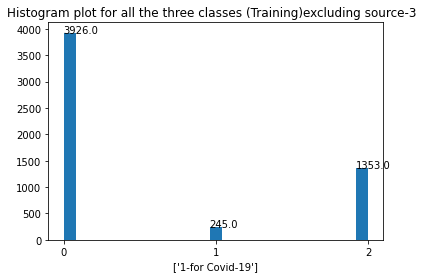

In [0]:
arr = plt.hist(train_df.labels,bins=25)
plt.text(arr[1][0],arr[0][0],str(arr[0][0]))
plt.text(arr[1][12],arr[0][12],str(arr[0][12]))
plt.text(arr[1][24],arr[0][24],str(arr[0][24]))
plt.xticks(np.arange(3))
plt.xlabel(['1-for Covid-19'])
plt.title("Histogram plot for all the three classes (Training)excluding source-3  ")
plt.show()

#Class Imbalance Found!

In [0]:
#over-sampling has been done in order to remove or minimize the effect of class imbalance along with the various data transformations method 
from sklearn.utils import resample
fraud1 = train_df[train_df['labels']==1]
fraud2 = train_df[train_df['labels']==2]
not_fraud = train_df[train_df['labels']==0]
fraud_upsampled = resample(fraud1,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results
fraud_upsampled1 = resample(fraud2,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled, fraud_upsampled1])

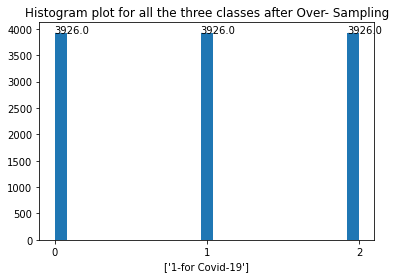

In [0]:
arr = plt.hist(upsampled.labels,bins=25)
plt.text(arr[1][0],arr[0][0],str(arr[0][0]))
plt.text(arr[1][12],arr[0][12],str(arr[0][12]))
plt.text(arr[1][24],arr[0][24],str(arr[0][24]))
plt.xticks(np.arange(3))
plt.xlabel(['1-for Covid-19'])
plt.title("Histogram plot for all the three classes after Over- Sampling")
plt.show()
train_df = upsampled


<center> Counter containing the partition alotment for 5-fold Validation </center>

In [0]:
#dataset volume in all the partitions 
from collections import Counter
t = train_df.Partition
z = Counter(t)
print(z)

Counter({1: 2692, 4: 2325, 5: 2293, 3: 2244, 2: 2224})


In [0]:
#PYTORCH CLASS FOR PREPARATION OF DATA LOADER TENSORS 

class dataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
 
        self.labels = dataframe               #Dataframe containing labels,partition and Data Source  
        self.root_dir = root_dir                    #path of the images 
        self.transform = transform                  #transformations applied on the image 
        
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        if(self.labels.iloc[idx, 1]!='Source-6'):
          
          img_name = os.path.join(self.root_dir,self.labels.iloc[idx, 1],self.labels.iloc[idx, 0])
        else:
          name_png = ['COVID-00015a','COVID-00015b','COVID-00045','COVID-00045','COVID-00048']
          if self.labels.iloc[idx,0] in name_png:

            img_name = os.path.join(self.root_dir,self.labels.iloc[idx, 1],self.labels.iloc[idx, 0]+'.png')
          else:
            img_name = os.path.join(self.root_dir,self.labels.iloc[idx, 1],self.labels.iloc[idx, 0]+'.jpg')
          #this line directly reads the image from the integrated folder 
        img = Image.open(img_name).convert('RGB')
        #img = Image.fromarray(img, mode='RGB')
    
        
        labels = self.labels.iloc[idx, -1]
        labels = np.array([labels])

        if self.transform:
            img = self.transform(img)

        return img,labels    

<center>Rescaling and standarisation of images along with various transformations have been done</center>

In [0]:
batch_size = 64
transform = transforms.Compose([transforms.Resize((32,32)),transforms.RandomHorizontalFlip(),transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
train_set = dataset(train_df,rootpath,transform = transform)
test_set = dataset(test_df,rootpath,transform = transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)
#trainloader = torch.utils.data.DataLoader(train_set,batch_size = batch_size,shuffle = True)

In [0]:
for data in testloader:
  img,labels = data
  print(img.shape,labels.shape)
  break
# Shape of the image  

torch.Size([64, 3, 32, 32]) torch.Size([64, 1])


In [0]:
use_gpu = torch.cuda.is_available()

if use_gpu:
    print('GPU is avaialble!')
    
else :
    print("Not Available")

GPU is avaialble!


In [0]:
dropout_prob = 0.3
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3,6, kernel_size=3)   #(3,32,32)==(6,30,30)
        self.norm1 = nn.BatchNorm2d(6)              #(6,30,30) == (6,28,28)
        self.conv1_drop = nn.Dropout2d(p=0.1)
        self.pool1 = nn.MaxPool2d(2,stride=2)         #(6,14,14)
        self.conv2 = nn.Conv2d(6, 12, kernel_size=3)#(12,12,12)
        self.conv2_drop = nn.Dropout2d(p=0.2)
        self.pool2 = nn.MaxPool2d(2,stride=2)     #(12,6,6)
        self.conv3 = nn.Conv2d(12, 24, kernel_size=3)#(24,4,4)
        self.conv3_drop = nn.Dropout2d(p=0.3)
        self.fc1 = nn.Linear(4*4*24, 120)
        self.fc1_drop = nn.Dropout(p=0.4)
        self.fc2 = nn.Linear(120, 84)
        self.fc1_drop = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(84, 3)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(self.norm1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = x.view(-1, 4*4*24)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

In [3]:
from torchvision import models
from torchsummary import summary
print(summary(LeNet(), (3, 32, 32)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 30, 30]             168
       BatchNorm2d-2            [-1, 6, 30, 30]              12
         MaxPool2d-3            [-1, 6, 15, 15]               0
            Conv2d-4           [-1, 12, 13, 13]             660
         MaxPool2d-5             [-1, 12, 6, 6]               0
            Conv2d-6             [-1, 24, 4, 4]           2,616
            Linear-7                  [-1, 120]          46,200
            Linear-8                   [-1, 84]          10,164
            Linear-9                    [-1, 3]             255
Total params: 60,075
Trainable params: 60,075
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.12
Params size (MB): 0.23
Estimated Total Size (MB): 0.36
---------------------------------------------

In [0]:
net = LeNet()
net.cuda()


LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (norm1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1_drop): Dropout2d(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.2, inplace=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (conv3_drop): Dropout2d(p=0.3, inplace=False)
  (fc1): Linear(in_features=384, out_features=120, bias=True)
  (fc1_drop): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=3, bias=True)
)

In [0]:
#VARIOUS PARAMETERS FOR TRAINING OF MODEL
learning_rate=0.003
num_epochs=2
criterion = nn.NLLLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate, weight_decay=0.01) 
#in order to prevent over-fitting of the model l-2 regularization has been applied 

In [0]:
from sklearn.model_selection import KFold
kf = KFold(5)
fold_count = 0
folds = 5
train_loss = [[]*num_epochs]*folds  
train_acc = [[]*num_epochs]*folds 
valid_loss = [[]*num_epochs]*folds 
valid_acc = [[]*num_epochs]*folds 
#FIVE-fold validation in which all the partitions are pre-defined 


In [0]:
start = timeit.default_timer()

for i in range(1,6):
        
        
        train_fold_df = train_df[train_df['Partition']!=i].copy()
        valid_fold_df = train_df[train_df['Partition']==i].copy()
        
        train_fold_df.reset_index(drop=True,inplace=True)
        valid_fold_df.reset_index(drop=True,inplace=True)
        #dynamic data loaders have been loaded for 4-fold cross vallidation 
        train_fold = dataset(train_fold_df,rootpath,transform = transform)
        valid_fold = dataset(valid_fold_df,rootpath,transform = transform)

        
        
        trainloader = torch.utils.data.DataLoader(train_fold, batch_size=batch_size,shuffle=True)
        validloader = torch.utils.data.DataLoader(valid_fold, batch_size=batch_size, shuffle=True)

        best_model_wts = net.state_dict()
        best_acc = 0

        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

        
        print('FOLD ',fold_count+1,'\n')
            
        
        for epoch in range(num_epochs):
                    
                    
                        for phase in ['train','valid']:
                            if phase == 'train':
                                net.train(True)
                                dataloader = trainloader
                                
                            
                            else:
                                net.train(False)
                                dataloader = validloader

                            running_loss = 0.0 
                            running_corr = 0
                    
                            
                            for i,data in enumerate(dataloader):
                                inputs,labels = data
                                if use_gpu:
                                    inputs = inputs.cuda()
                                    labels = labels.cuda()
                                labels=labels.squeeze(1)
                                #Gradients intialization 
                                if phase == 'train':
                                    net.zero_grad()
                                    optimizer.zero_grad() 

                                # Forward propogation 
                                outputs = net(inputs)
                                
                                # Predicted class is the one with maximum probability
                                preds = torch.argmax(outputs,dim=1)

                                # Finding the loss
                                loss = criterion(outputs, labels)

                                if phase=='train':
                                    loss.backward()
                                    optimizer.step()
                                running_loss += loss 
                                running_corr += torch.sum(preds==labels) 
                               

                            
                            # Updating the model parameters
                            for f in net.parameters():
                                f.data.sub_(f.grad.data * learning_rate)
                            if phase == 'train':
                              z = float(running_loss.item())
                              epoch_loss = z/int(len(train_fold_df))   #Total loss for one epoch
                              epoch_acc = int(running_corr.item())/int(len(train_fold_df))
                            else:
                              epoch_loss = running_loss.item()/int(len(valid_fold_df))   #Total loss for one epoch
                              epoch_acc = running_corr.item()/int(len(valid_fold_df))
                            if phase =='valid' and epoch_acc > best_acc:
                                best_acc = epoch_acc
                                best_model_wts = net.state_dict()

                            if phase == 'train':
                                train_loss[fold_count].append(epoch_loss) #Saving the loss over epochs for plotting the graph
                                train_acc[fold_count].append(epoch_acc) 
                                print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f} '.format(epoch+1,num_epochs,epoch_loss,epoch_acc))


                            else:
                                valid_loss[fold_count].append(epoch_loss)
                                valid_acc[fold_count].append(epoch_acc)
                                print('Epoch {:.0f}/{:.0f} : Validation loss: {:.4f} | Validation Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc))
                        
                        scheduler.step()       
                        
        fold_count = fold_count + 1
        print("\n")
        

print("\nTotal Training time = ",timeit.default_timer()-start,' seconds')


FOLD  1 

Epoch 1/2 : Training loss: 0.0059 | Training Accuracy: 0.8470 
Epoch 1/2 : Validation loss: 0.0051 | Validation Accuracy: 0.9123
Epoch 2/2 : Training loss: 0.0028 | Training Accuracy: 0.9391 
Epoch 2/2 : Validation loss: 0.0043 | Validation Accuracy: 0.9346


FOLD  2 

Epoch 1/2 : Training loss: 0.0027 | Training Accuracy: 0.9402 
Epoch 1/2 : Validation loss: 0.0024 | Validation Accuracy: 0.9541
Epoch 2/2 : Training loss: 0.0016 | Training Accuracy: 0.9654 
Epoch 2/2 : Validation loss: 0.0026 | Validation Accuracy: 0.9375


FOLD  3 

Epoch 1/2 : Training loss: 0.0020 | Training Accuracy: 0.9567 
Epoch 1/2 : Validation loss: 0.0016 | Validation Accuracy: 0.9746
Epoch 2/2 : Training loss: 0.0015 | Training Accuracy: 0.9697 
Epoch 2/2 : Validation loss: 0.0014 | Validation Accuracy: 0.9728


FOLD  4 

Epoch 1/2 : Training loss: 0.0015 | Training Accuracy: 0.9696 
Epoch 1/2 : Validation loss: 0.0020 | Validation Accuracy: 0.9548
Epoch 2/2 : Training loss: 0.0011 | Training Accura

In [0]:
if use_gpu:
  test_pred = torch.LongTensor().cuda()
else:
  test_pred = torch.LongTensor()
for i,data in enumerate(testloader):
    inputs,labels = data
    if use_gpu:
      inputs = inputs.cuda()
      labels = labels.cuda()
    output = net(inputs) 
    
    # Predicted class is the one with maximum probability
    preds = torch.argmax(output,dim=1)
    
    test_pred = torch.cat((test_pred, preds), dim=0)
    

In [0]:
correct_pred = 0
a = test_df.labels
a = np.array(a)

for i in range(len(test_df)):
    if(test_pred[i]==a[i]):
        correct_pred += 1
print('TESTING ACCURACY =',100*(correct_pred/len(test_df)))

TESTING ACCURACY = 79.72027972027972


In [0]:
zz = np.array(train_loss)[0]
zz = zz.reshape((5,num_epochs))
valid_loss = np.array(valid_loss)[0]
valid_loss = valid_loss.reshape((5,num_epochs))
train_acc = np.array(train_acc)[0]
train_acc = train_acc.reshape((5,num_epochs))
valid_acc = np.array(valid_acc)[0]
valid_acc= valid_acc.reshape((5,num_epochs))

<center> PLOTING OF TRAINING AND VALIDATION LOSSES AND ACCURACIES (NUMBER OF CORRECT PREDICTION)

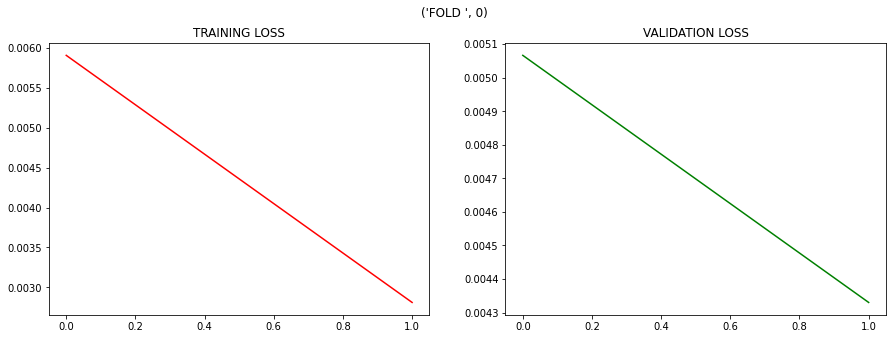

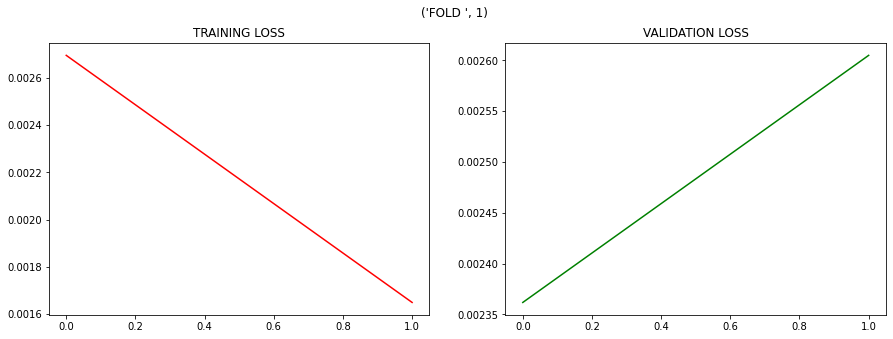

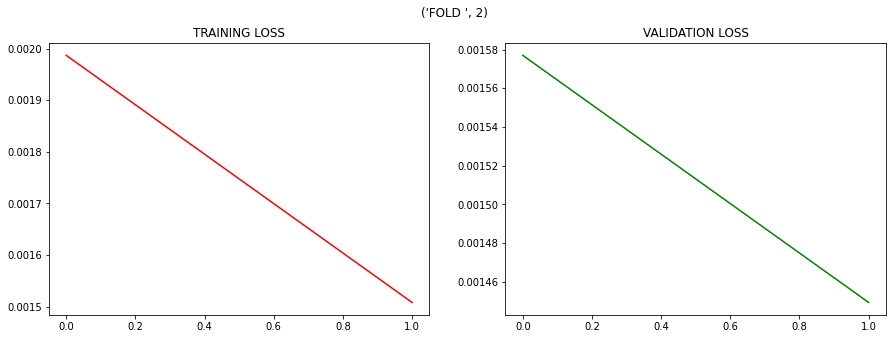

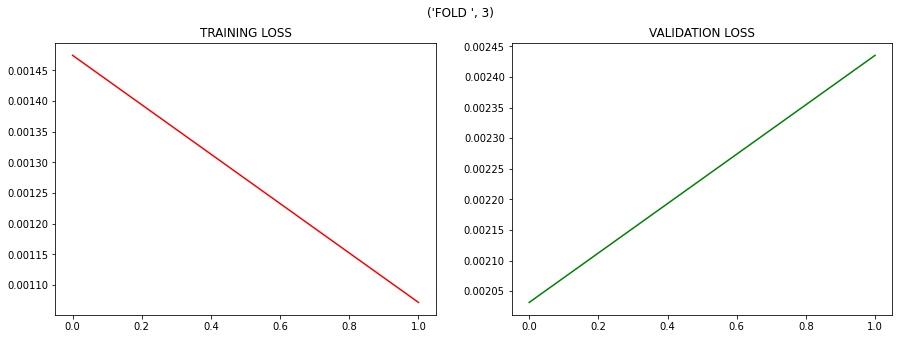

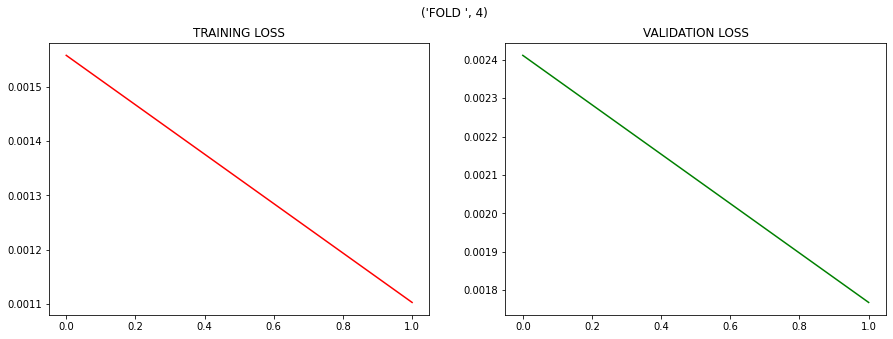

In [0]:
for i in range(folds):
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(num_epochs),zz[i],'r')
    plt.title("TRAINING LOSS")
    plt.subplot(122)
    plt.plot(range(num_epochs),valid_loss[i],'g')
    plt.title("VALIDATION LOSS")
    plt.suptitle(('FOLD ',i))

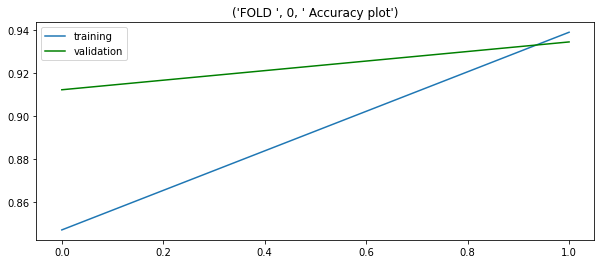

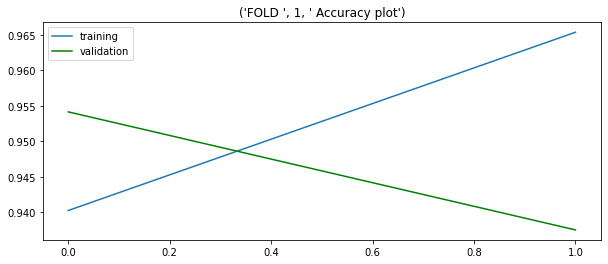

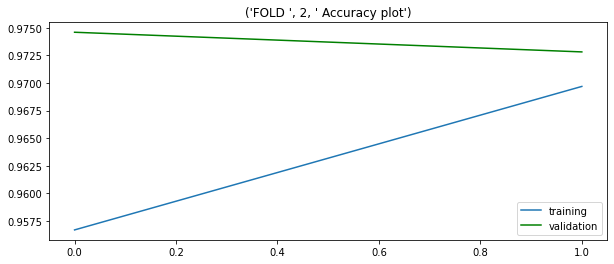

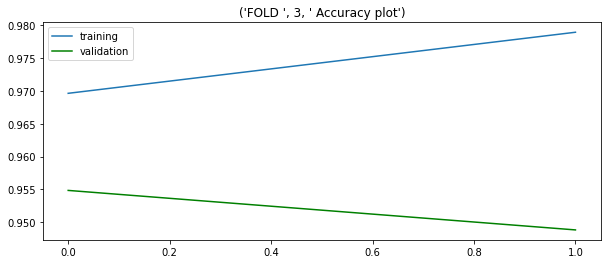

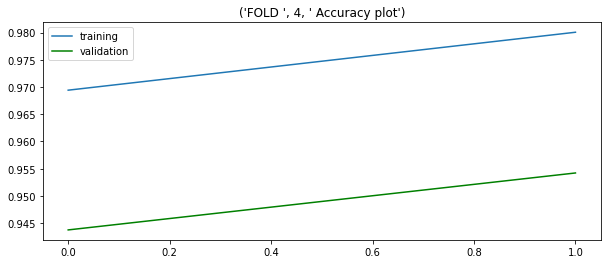

In [0]:
for i in range(folds):
    plt.figure(figsize =(10,4))

    plt.plot(range(num_epochs),train_acc[i])
    plt.plot(range(num_epochs),valid_acc[i],'g')
    plt.title(('FOLD ',i," Accuracy plot"))
    plt.legend(('training','validation'))